## Necesssary Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

sns.set()

## Loading the Data

In [2]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Plotting each Feature with respect to the Outcome

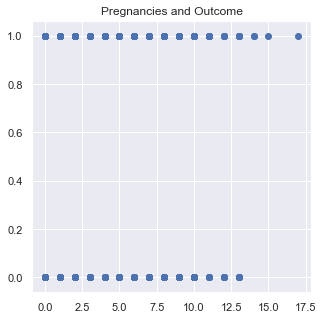

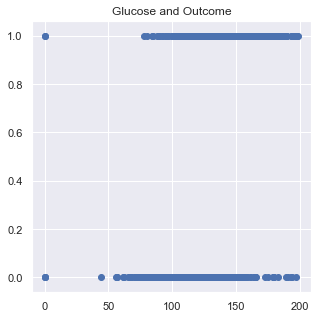

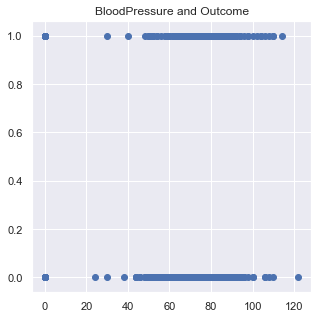

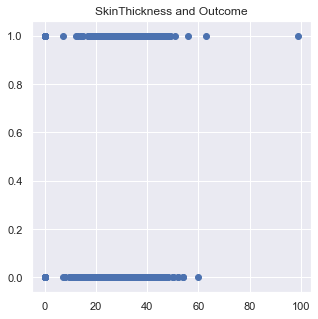

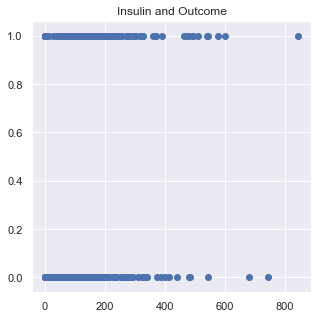

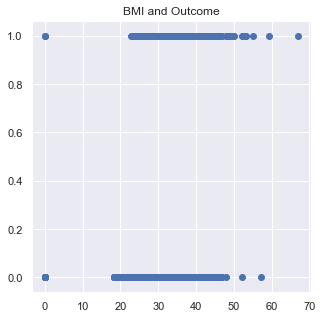

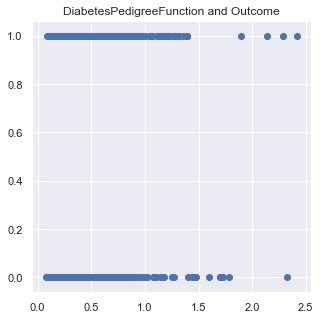

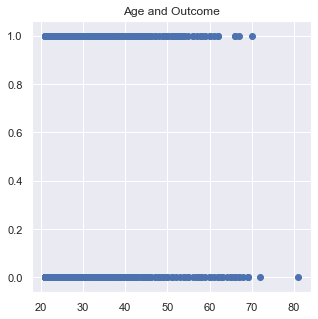

In [4]:
for i in range(len(data.columns)):
    if data.columns[i] != 'Outcome':
        f, ax = plt.subplots(sharey = True,figsize = (5,5))
        ax.scatter(data[data.columns[i]], data['Outcome'])
        ax.set_title('{} and Outcome'.format(data.columns[i]))
        plt.show()

## Setting the Target value and the Input features

In [5]:
targets = data['Outcome']
inputs = data.drop(['Outcome'], axis=1)

## Test and Train Split

In [6]:
x_tr, x_te, y_tr, y_te = train_test_split(inputs, targets, test_size= 0.2, random_state= 365)

## Obtaining the statistics of the data using the statsmodels 

In [7]:
input_scaled = sm.add_constant(inputs)
reg_log = sm.Logit(targets, input_scaled)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


c:\users\gauth\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Fri, 25 Sep 2020   Pseudo R-squ.:                  0.2718
Time:                        17:56:28   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.4047      0.717    -11.728      0.000      -9.809      -7.000
Pregnancies                  0.1232      0.032      3.840      0.000       0.060       0.186
Glucose                      0.0352      0.004      9.481      0.000       0.028       0.042
BloodPressure               -0.0133      0.005     -2.540      0.011      -0.024      -0.003
SkinThickness                0.0006      0.007      0.090      0.929      -0.013       0.014
Insulin                     -0.0012      0.001     -1.322      0.186      -0.003       0.001
BMI                          0.0897      0.015      5.945      0.000       0.060       0.119
DiabetesPedigreeFunction     0.9452      0.299      3.160      0.002       0.359       1.531
Age                          0.0149      0.009      1.593      0.111      -0.003       0.033
============================================================================================
"""

## Performing the Regression using sklearn

In [8]:
LogReg = LogisticRegression(max_iter = 1000)
LogReg.fit(x_tr, y_tr)

LogisticRegression(max_iter=1000)

## Testing the Model

In [9]:
y_pred = LogReg.predict(x_te)
pd.DataFrame({'Y test':y_te, 'Y predicted':y_pred}).head(n=20)

,Y test,Y predicted
389,0,0
523,1,1
497,0,0
570,0,0
153,0,1
650,0,0
494,0,0
94,0,0
699,0,1
69,0,0


## Obtaining the accuracy of the model

In [10]:
cnf_mat = metrics.confusion_matrix(y_te, y_pred)
print(metrics.accuracy_score(y_te, y_pred))

0.8051948051948052


Text(0.5, 12.5, 'Predicted Values')

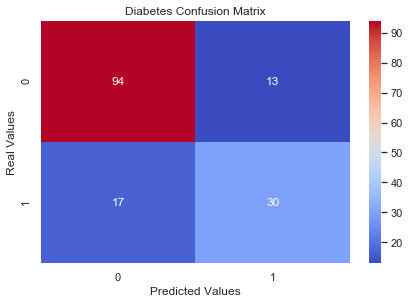

In [11]:
sns.heatmap(pd.DataFrame(cnf_mat), annot=True,cmap='coolwarm',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Diabetes Confusion Matrix', y=1)
plt.ylabel('Real Values')
plt.xlabel('Predicted Values')

## Checking the Error Distribution

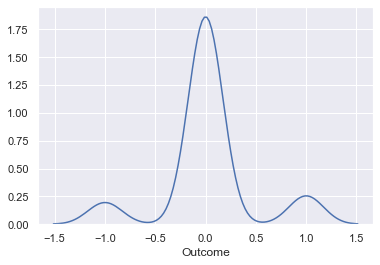

In [12]:
sns.distplot(y_te-y_pred, hist=None)